REDES NEURAIS ARTIFICIAIS
=========================



<hr>

## INTRODUÇÃO



Nossa classe `Valor` já faz tudo que precisamos para usarmos ela como suporte para construirmos uma rede neural. Neste notebook iremos construir uma rede neural por partes, primeiramente criando um neurônio artificial, depois uma camada de neurônios e, por fim, uma rede neural multicamadas.



## OBJETIVO



Criar uma rede neural artificial usando Python.



> <hr>

## IMPORTAÇÕES



In [10]:
import random
import math
from classes import Valor
from funcoes import plota_grafo

> <hr>

## CÓDIGO E DISCUSSÃO



> #### O NEURÔNIO ARTIFICIAL

Vamos construir um neurônio artificial. Como iremos ter vários neurônios em uma rede neural, podemos construir uma classe que servirá de receita para criar esses neurônios. Lembre-se que um neurônio artificial recebe informação de sinapses artificiais ponderadas, soma estas informações, adiciona um viés à esta soma, aplica uma função de ativação e, finalmente, passa a informação adiante.



In [11]:
class Neuronio:
    def __init__(self, num_dados_entrada):
        pesos = [] # variável peso é uma instância de valor
                    # colocaremos dentro de uma lista

        for _ in range(num_dados_entrada):
            peso = Valor(random.uniform(-1, 1))
            pesos.append(peso)

        self.pesos = pesos
        self.vies = Valor(random.uniform(-1, 1)) # distribuição uniforme para uma escolha aleatória
                                                    #a mesma chance para qualquer número entre -1 e 1 ser sorteado

    def __call__(self, x):
        """Executa a computação interna do neurônio.

        Args:
          x: lista de valores de entrada (informação que chega ao neurônio).

        Returns:
          Informação que o neurônio propaga adiante. Trata-se da aplicação da função de ativação à soma de `x` vezes os pesos do
          neurônio adicionado ao viés.
        """
        assert len(x) == len(self.pesos), "Seu X tem tamanho errado." # essa mensagem aparecerá # não é necessária, mas ajuda a visualiar o erro
        soma = 0
        for x_, p in zip(x, self.pesos):
            soma = soma + x_ * p
            
        dado_de_saida = soma.sig() # se tudo é valor, dado de saída é valor também
        
        return dado_de_saida

Vamos fazer um teste simples do nosso neurônio artificial.



In [13]:
dados_de_entrada = [2.5, 4.25]

meu_neuronio = Neuronio(len(dados_de_entrada))

print(meu_neuronio(dados_de_entrada)) # a cada vez que se roda o código, o valor varia

Valor(data=0.2838057689676091)


> <HR>

> #### A CAMADA DE NEURÔNIOS

Uma rede neural artificial com apenas um neurônio é um modelo relativamente simples. As redes neurais artificias costumam ser mais interessantes com mais neurônios. O motivo para isso é que com mais neurônios nós conseguimos identificar padrões mais complexos nos dados na tentativa de induzir um modelo preditivo melhor.

Uma estrutura de organização de neurônios artificiais são as `camadas de neurônios`. Uma camada de neurônio é um conjunto de neurônios onde cada neurônio é independente (tem seu próprio conjunto de pesos e viés), porém recebe a mesma informação. A quantidade de informação recebida estará representada no argumento `num_dados_entrada` abaixo. Assim como o neurônio artificial, uma camada de neurônios será modelada usando uma classe.



> <div style=' text-align: justify; text-justify: inter-word;'> Caso você se sinta mais confortável com a biologia, para entender neurônios e camadas é sempre possível pensar na organização do córtex cerebral. Não é incomum ver na literatura o termo 'laminação do córtex cerebral' e isso se refere ao fato de que o córtex é composto por 6 camadas e cada uma dessas camadas é composta por um tipo de neurônio, o que implica que cada uma delas também exerça uma função diferente. Aqui, nós faremos a mesma coisa, construiremos camadas (não necessariamente 6) e elas são compostas por neurônios diferentes.

> Curiosidade: uma rede neural com uma camada e um neurônio é chamada de 'Perceptron'.

In [4]:
class Camada:
    def __init__(self, num_dados_entrada, num_neuronios):
        neuronios = [] # para criar a camada, voce cria neuronios

        for _ in range(num_neuronios):
            neuronio = Neuronio(num_dados_entrada)
            neuronios.append(neuronio)

        self.neuronios = neuronios

    def __call__(self, x):
        """Executa a computação de cada neurônio da camada (para chamar um neurônio).

        Args:
          x: lista de valores de entrada (informação que chega aos neurônios).

        Returns:
          Informação que os neurônios da camada propagam adiante.
        """
        saidas = [] # para cada neuronio de self, a informação será executar o neuroônio

        for neuronio in self.neuronios:
            informacao = neuronio(x)
            saidas.append(informacao)

        if len(saidas) == 1: # se o tamanho da lista é 1
            return saidas[0] # tirar esse número da lista e apresentar só ele
                                # provavlemente o usuário final naõ quer uma lista
        else:
            return saidas

Vamos fazer um teste simples da nossa camada de neurônios artificiais.



In [5]:
dados_de_entrada = [2.5, 4.25]
num_neuronios = 3

minha_camada = Camada(len(dados_de_entrada), num_neuronios)

print(minha_camada(dados_de_entrada)) # cada número corresponde a cada um dos neurônios

[Valor(data=0.40828105963950073), Valor(data=0.07999342254135539), Valor(data=0.12011813875533142)]


> <hr>

> #### A REDE NEURAL MULTILAYER PERCEPTRON (MLP)

Uma rede neural artificial composta de uma ou mais camadas ocultas de neurônios (isto é, camadas que não sejam camadas de entrada ou camadas de saída) é chamada de Multilayer Perceptron ou simplesmente `MLP`.

A informação em uma rede MLP <mark>flui da esquerda para a direita</mark>, iniciando na camada de entrada, passando por todas as camadas ocultas (uma a uma, na ordem) e saindo na camada de saída. A informação em uma MLP <mark>nunca retorna, apenas segue em frente</mark>. Por conta disso, MLPs também são chamadas de `feedforward networks`, ou seja, redes neurais que sempre propagam &ldquo;para frente&rdquo; a informação. Existem outros tipos de redes neurais que não são `feedforward`, porém estas não serão vistas neste curso.

Como você provavelmente já estava esperando, usaremos uma classe para servir como receita para criar nossas redes MLP.



In [6]:
class MLP:
    def __init__(self, num_dados_entrada, num_neuronios_por_camada):

        percurso = [num_dados_entrada] + num_neuronios_por_camada
        camadas = []

        for i in range(len(num_neuronios_por_camada)):
            camada = Camada(percurso[i], percurso[i+1])
            camadas.append(camada)

        self.camadas = camadas

    def __call__(self, x):
        """Executa a computação de cada camada.

        Como a rede MLP é uma rede feedforward, a informação que uma camada
        recebe é a informação de saída da camada anterior. A única exceção é a
        camada de entrada, onde a informação é fornecida pelo usuário

        Args:
          x: informação fornecida na camada de entrada.

        Returns:
          Informação recuperada na camada de saída.
        """
        for camada in self.camadas:
            x = camada(x)
        return x

Vamos fazer um teste simples da nossa rede MLP.



In [7]:
dados_de_entrada = [2.5, 4.25]
num_neuronios_por_camada = [3, 2, 1]

minha_mlp = MLP(len(dados_de_entrada), num_neuronios_por_camada)

resultado = minha_mlp(dados_de_entrada)

print(resultado)

Valor(data=0.4611785883381712)


Observe que nosso `resultado` é uma instância da classe `Valor`! O que nós podemos fazer com instâncias desta classe? Sim, podemos computar o gradiente local usando nosso algoritmo de `autograd` e plotar o grafo computacional!!



> Ou seja, aqui, no final do notebook para a construção de uma rede neural, nós retomamos os raciocínios das aulas anteriores: classe 'Valor' e grafos.

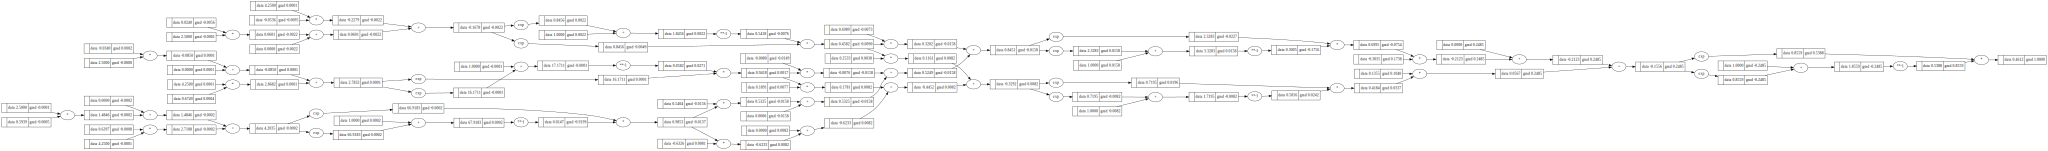

In [8]:
resultado.propagar_tudo()
grafo = plota_grafo(resultado)

# para salvar o grafo
grafo.render("rede_neural", format="png")

grafo

> <hr>

 ## CONCLUSÃO



<div style=' text-align: justify; text-justify: inter-word;'>
    Apresar de se tratar de um assunto complexo, aqui neste notebook também percebemos a permanência de um esforço que se mostra constante: tratar um assunto complexo por partes, de maneira a assegurar que suas componentes particulares sejam compreendidas e visualizadas. Nesse sentido, primeiro vimos como neurônios são constuídos, depois vemos como camadas de neurônios são cosntruídas e, por último, vimos como a rede neural multi camadas foi constuída. Foi possível perceber que redes neurais são compostas por inúmeros elementos que aludem ao funcionamento do sistema nervoso: vários neurônios, organizados em várias camadas que, performando juntas dão o resultado que se busca com o programa. Na escrita da classe neurônio escrevemos uma soma, nas camadas, mostramos que as informações que são recebidas pela camada passam pelos neurônios que realizam as somas e, no final, obtemos um só valor, como mostrado no grafo.

<hr>

## Playground



In [9]:
# cada vez que criamos um neurônio, ele é diferente
# rede de uma camada só de um neurônio só
# perceptron